In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In order to start, we have to define the equation that defines the projectile motion of the ball. In order to do this I will define the forces that act on the ball seperately to simplify the final equation.

According to NASA (https://www.grc.nasa.gov/WWW/K-12/airplane/balldrag.html) the drag coefficient on a baseball is equal to 0.3
Similarly according to NASA (https://www.grc.nasa.gov/WWW/K-12/airplane/balllift.html) the lift coefficient on a baseball is 0.15

It is also important to note that a baseball's circumfrence and mass are not constant for all baseballs, instead they fall inside a tolerance. The range for radius is .229-.235 meters and the mass is .142-.149 kg (https://en.wikipedia.org/wiki/Baseball_(ball)#:~:targetText=Under%20the%20current%20rules%2C%20a,%E2%80%9376%20mm%20in%20diameter). We will just be using the middle of the range as an approximation; i.e .232 m and .1455 kg

For air density, we will just be using the values provided here (https://www.purplerow.com/2018/1/8/16846116/colorado-rockies-coors-field-arizona-diamondbacks-chase-field-comparison#:~:targetText=On%20a%20typical%20summer%20day,has%20an%20air%20density%20of%20.) This also provides us with an air density for San Diego which we will use as our control.

Average Pitch Height of 1.14 meters

In [115]:
#Here we will be defining a bunch of constants used later in case we want to change them.
Cd= 0.3
Cl=0.15
mass= .1455
Rball = .232/(2*np.pi)
CrossA= np.pi* Rball**2
g=-9.8
Airdensea= 1.182 
Airdenco= .966 
z0=1.14

termvsea=(np.sqrt ( (2 * mass * g) / (Cd * Airdensea * CrossA) ))
termvco=(np.sqrt ( (2 * mass * g) / (Cd * Airdenco * CrossA) ))


In [123]:
def terminaldrag(Location): #Arg requires either co or sea for the two heights
    if Location == "co":
        return(.5*Cd*Airdenco*CrossA*termvco**2)
    elif Location == "sea":
        return(.5*Cd*Airdensea*CrossA*termvsea**2)

def drag(vel,Location):
    if Location == "co":
        return (.5*Cd*Airdenco*CrossA*(vel**2))
    elif Location == "sea":
        return (.5*Cd*Airdensea*CrossA*(vel**2))
    
def lift(vel,spin,Location):
    if Location == 'co':
        return(Cl*(4 * np.pi**2 * Rball**3 * spin * Airdenco * vel) * (4/3))
    elif Location == 'sea':
        return(Cl*(4 * np.pi**2 * Rball**3 * spin * Airdensea * vel) * (4/3))


def ascensionf(vel, Location):
    if Location == 'co':
        return( (mass*g) - drag(vel, Location))
    elif Location =="sea":
        return( (mass*g) - drag(vel, Location))
    

In [135]:
def Baseballflight(t, y, spin, Location):
    '''y is an array with [X0,Y0,Vx,Vy]'''
    
    dydt= np.zeros(4)
    
    dydt[1]=y[3]
    if y[3]>=0:
        dydt[3]= (ascensionf(y[3],Location)+lift(y[2],spin,Location))/mass
    elif y[3]<0:
        dydt[3]= ((mass*g)+drag(y[3],Location)+lift(y[2],spin,Location))/mass
    dydt[0]=y[2]
    dydt[2]= -drag(y[2],Location)/mass
    return(dydt)

Now I will be including the Runga Kutta method as a way to solve these equations. I will be largely using the code Professor Miller Provided in his example on the Runga Kutta Method.

In [189]:
def RungeKutta4(func, y_0, t, spin, Location):
    """ Classical Runge-Kutta (RK4) approximation to a first-order ODE system
    with initial conditions.

    Args:
        func: (callable) The first-order ODE system to be approximated.
        y_0:  (array)    The initial condition.
        t:    (array)    A sequence of time points for which to solve for y.
        args: (dict)     Extra arguments to pass to function.

    Out:
        y:    (array)    The approximated solution of the system at each time in t,
                         with the initial value y_0 in the first row.
    """

    # Initialise the approximation array
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0

    # Loop through the time steps, approximating this step from the prev step
    for i, t_i in enumerate(t[:-1]):
        if y[i][1]<=0:
            return(y)
        else:
            h   = t[i+1] - t_i # size of the step

            k_1 = h*func(t_i, y[i], spin, Location)
            k_2 = h*func(t_i + h/2. , y[i] + k_1/2., spin, Location)
            k_3 = h*func(t_i + h/2. , y[i] + k_2/2., spin, Location)
            k_4 = h*func(t_i + h    , y[i] + k_3, spin, Location)

            y[i+1] = y[i] + 1/6.*(k_1 + 2.*k_2 + 2.*k_3 + k_4) # RK4 step
        
    return y

In [190]:
N     = 50 # Num of steps to take
t_max = 7.5 # Limit of the range to evaluate the function
T    = np.linspace(0., t_max, N+1) # Array of discretized steps


y_0= np.array([0,1.14,49*np.cos(27*np.pi/180),49*np.sin(27*np.pi/180)])
ysea= RungeKutta4(Baseballflight,y_0,T,41,'sea')
yco=RungeKutta4(Baseballflight,y_0,T,41,'co')

In [261]:
 lis=ysea.tolist()
print(lis[50][2])

0.0


In [283]:
def Cleanerfunc(array):
    temp=array.tolist()
    for i in range(len(temp)-1):
        if temp[i][2]==0:
            del temp[i]
    return(temp)

In [284]:
Cleanerfunc(ysea)


[[0.0, 1.14, 43.659319685230024, 22.24553448723779],
 [6.439461332778173, 4.40267204044645, 42.216338682571774, 21.257588730583887],
 [12.669514997143432,
  7.517531256340348,
  40.865689731665306,
  20.27472118470852],
 [18.703352761367317,
  10.485346291944024,
  39.59878549383425,
  19.296999113839195],
 [24.55295782953022,
  13.306885346471317,
  38.40807149641792,
  18.324353447659785],
 [30.22924810721674, 15.982897455613134, 37.28687537740283, 17.35660109581607],
 [35.742198848076804,
  18.514096794372556,
  36.22928178590627,
  16.393463057129047],
 [41.100948142900435,
  20.901149428681126,
  35.2300279851506,
  15.434579072749287],
 [46.31388805325058,
  23.144662044164058,
  34.28441626819341,
  14.479519425008423],
 [51.388743671936666,
  25.245172261551176,
  33.388240110082045,
  13.527794366363818],
 [56.33264198019614,
  27.20314021358658,
  32.537721607021915,
  12.578861568913943],
 [61.152172042068365,
  29.018941110989367,
  31.72945823991029,
  11.632131909372578],

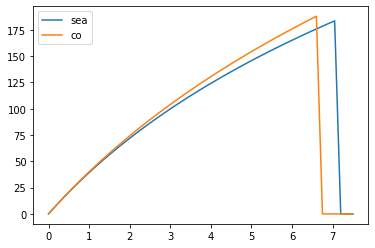

In [191]:
plt.plot(T,ysea[:,0],label='sea')
plt.plot(T,yco[:,0],label='co')
plt.legend()

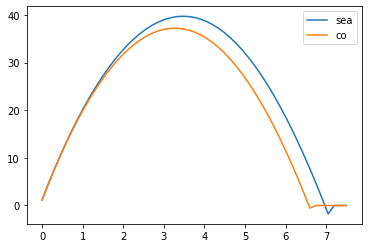

In [192]:
plt.plot(T,ysea[:,1],label='sea')
plt.plot(T,yco[:,1],label='co')
plt.legend()

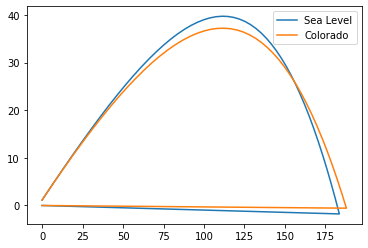

In [193]:
plt.plot(ysea[:,0],ysea[:,1],label='Sea Level')
plt.plot(yco[:,0],yco[:,1],label='Colorado')
plt.legend()

